In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
data_dir = './dataset/step1'
IMG_SIZE = 224 
BATCH_SIZE = 32
EPOCHS = 15  


c:\Users\hyun4\Documents\Develop\shimter-ai


In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.2, 
    subset="training", 
    seed=123, 
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)  

./dataset/step1
Found 140 files belonging to 2 classes.
Using 112 files for training.


In [4]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 140 files belonging to 2 classes.
Using 28 files for validation.


In [5]:
class_names = train_dataset.class_names
print("Names of class:", class_names)
num_classes = len(class_names)

Names of class: ['abnormal', 'normal']


In [6]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

In [8]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [9]:
base_model.trainable = False


In [10]:
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)  # 베이스 모델은 추론 모드로 동작 (가중치 동결)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

In [11]:
model = tf.keras.Model(inputs, outputs)

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [13]:
print("model:")
model.summary()

model:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
print("Start to learn")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)
print("Finish")


Start to learn
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 805ms/step - accuracy: 0.7054 - loss: 0.6297 - val_accuracy: 0.7857 - val_loss: 0.5619
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step - accuracy: 0.7589 - loss: 0.5655 - val_accuracy: 0.7857 - val_loss: 0.5430
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 0.7321 - loss: 0.5354 - val_accuracy: 0.7857 - val_loss: 0.5350
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step - accuracy: 0.8125 - loss: 0.5349 - val_accuracy: 0.7143 - val_loss: 0.5345
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step - accuracy: 0.8036 - loss: 0.4803 - val_accuracy: 0.7143 - val_loss: 0.5330
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 447ms/step - accuracy: 0.8125 - loss: 0.4894 - val_accuracy: 0.7143 - val_loss: 0.5310
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 526ms/step - accuracy: 0.8304 - loss: 0.4984 - val_accuracy: 0.7143 - val_loss: 0.5235
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - accuracy: 0.8036 - loss: 0.4875 - val_accuracy: 0.7

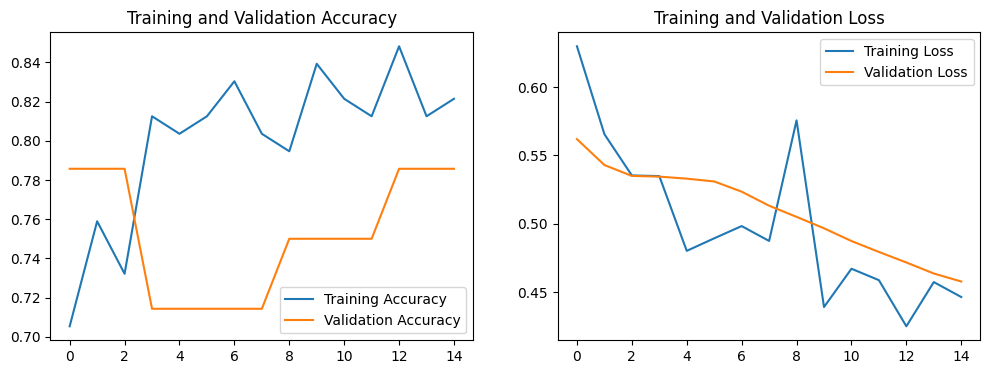

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import glob

image_paths = glob.glob(os.path.join('./dataset/step3/*.jpg'))

for test_image_path in image_paths:
    img = tf.keras.utils.load_img(
        test_image_path, target_size=(IMG_SIZE, IMG_SIZE)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array, verbose=0)
    score = tf.nn.softmax(predictions[0])

    file_name = os.path.basename(test_image_path)
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    print(f"File: {file_name} -> Class Prediction: '{predicted_class}' ({confidence:.2f}%)")
    
print('Finish to test')


File: 1000_F_217132285_OhaJpnPCjdp4zhlJaA42Izgt87JeJ2YX_jpg.rf.47e95a8ac68cce2c7f7aae9c12da4d06.jpg -> Class Prediction: 'normal' (67.68%)
File: 1000_F_217132285_OhaJpnPCjdp4zhlJaA42Izgt87JeJ2YX_jpg.rf.da64ef7f3d638847b3ed787e5febd2f2.jpg -> Class Prediction: 'normal' (62.95%)
File: 1000_F_217132285_OhaJpnPCjdp4zhlJaA42Izgt87JeJ2YX_jpg.rf.f3ce84546e65b19224ab87b5f5a22687.jpg -> Class Prediction: 'normal' (58.15%)
File: 101_jpg.rf.12d4987b2c587186ca833c65c11bddd1.jpg -> Class Prediction: 'abnormal' (65.90%)
File: 101_jpg.rf.3972ed5b8e79b8002e1b3bf7ede544ab.jpg -> Class Prediction: 'abnormal' (62.71%)
File: 101_jpg.rf.c90ac9c5f08a6e523905a0e4d97c39e7.jpg -> Class Prediction: 'abnormal' (62.88%)
File: 104_jpg.rf.3237550104c4a1b1c10d690879a1c3d5.jpg -> Class Prediction: 'abnormal' (69.57%)
File: 104_jpg.rf.37520d7d603fd036f502f55b233fd8d1.jpg -> Class Prediction: 'abnormal' (67.96%)
File: 104_jpg.rf.49f4f467c991ea1407cb1feaecc2d65e.jpg -> Class Prediction: 'abnormal' (67.96%)
File: 105_jpg